## Análise Exploratória dos Dados
Nesta parte inicial exploraremos os dados disponíveis, buscando alguns insights que podem ser úteis para a etapa de modelagem. Baixando o data set, e visualizando os dados. 

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')


# Salva o caminho do arquivo em uma variável para acesso mais fácil
caminho_arquivo_house = Path.cwd()

# Define o caminho relativo para a pasta de dados
pasta_dados = caminho_arquivo_house /  "Dados" / "Automobile_data.csv"

# Lê os dados de treinamento e armazena-os em um DataFrame chamado house_data_train
automobile_data = pd.read_csv(pasta_dados)

# Olhando os primeiros elementos
automobile_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [2]:
# Informação sobre a base de dados
automobile_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

__symboling__: Um valor que representa o risco associado ao carro. Um valor mais alto indica um risco maior. \
__normalized-losses__: A perda normalizada para o carro.\
__make:__ A marca do carro.\
__fuel-type__: O tipo de combustível que o carro usa (ex: gasolina, diesel).\
__aspiration__: O tipo de aspiração do motor do carro (ex: standard, turbo).\
__num-of-doors__: O número de portas do carro.\
__body-style__: O estilo da carroceria do carro (ex: sedan, hatchback, etc.).\
__drive-wheels__: As rodas que são movimentadas pelo motor (ex: fwd - dianteira, rwd - traseira, 4wd - quatro rodas).\
__engine-location__: A localização do motor no carro (ex: frente, traseira).\
__wheel-base__: A distância entre os eixos dianteiro e traseiro do carro.\
__length__: O comprimento do carro.\
__width__: A largura do carro.\
__height__: A altura do carro.\
__curb-weight__: O peso do carro sem passageiros ou carga.\
__engine-type__: O tipo de motor do carro.\
__num-of-cylinders__: O número de cilindros no motor do carro.\
__engine-size__: O tamanho do motor do carro.\
__fuel-system__: O sistema de combustível do carro.\
__bore__: O diâmetro dos cilindros do motor do carro.\
__stroke__: O curso dos pistões no motor do carro.\
__compression-ratio__: A taxa de compressão do motor do carro.\
__horsepower__: A potência do motor do carro.\
__peak-rpm__: As rotações por minuto máximas do motor do carro.\
__city-mpg__: A milhagem do carro na cidade (milhas por galão).\
__highway-mpg__: A milhagem do carro na estrada (milhas por galão).\
__price__: O preço do carro.

Com base no código acima, sabemos que temos as variáveis quantitativas são aquelas que possuem valores numéricos e podem ser medidas em escala contínua. Isso inclui a symboling, wheel-base, length, width, height, curb-weight, engine-size, bore, stroke, compression-ratio, horsepower, peak-rpm, city-mpg, highway-mpg e o price. As variáveis qualitativas são aquelas que possuem valores categóricos e descrevem características que não podem ser medidas em uma escala numérica. Esses incluem normalized-losses, make, fuel-type, aspiration, num-of-doors, body-style, drive-wheels, engine-location, engine-type, num-of-cylinders and fuel-system.

Estou interessado, agora, em saber o máximo e mínimo de cada variável:

In [3]:
import numpy as np

# Assuming that `automobile_data` is your DataFrame
for column in automobile_data.columns:
    if automobile_data[column].dtype in [np.int64, np.float64]:
        min_value = np.min(automobile_data[column])
        max_value = np.max(automobile_data[column])
        print(f"{column}: min={min_value}, max={max_value}")

symboling: min=-2, max=3
wheel-base: min=86.6, max=120.9
length: min=141.1, max=208.1
width: min=60.3, max=72.3
height: min=47.8, max=59.8
curb-weight: min=1488, max=4066
engine-size: min=61, max=326
compression-ratio: min=7.0, max=23.0
city-mpg: min=13, max=49
highway-mpg: min=16, max=54


Agora eu vou calcular a média e o desvio padrão de cada preditor quantitativo.

In [4]:
# Assuming that `automobile_data` is your DataFrame
for column in automobile_data.columns:
    if automobile_data[column].dtype in ['int64', 'float64']:
        mean_value = automobile_data[column].mean()
        std_value = automobile_data[column].std()
        print(f"{column}: mean={mean_value:.2f}, std={std_value:.2f}")

symboling: mean=0.83, std=1.25
wheel-base: mean=98.76, std=6.02
length: mean=174.05, std=12.34
width: mean=65.91, std=2.15
height: mean=53.72, std=2.44
curb-weight: mean=2555.57, std=520.68
engine-size: mean=126.91, std=41.64
compression-ratio: mean=10.14, std=3.97
city-mpg: mean=25.22, std=6.54
highway-mpg: mean=30.75, std=6.89


Agora eu vou remover a observação 10 a 86 e ver o que acontece com a minha média e desvio padrão. Podemos perceber, abaixo, que o desvio padrão cai em muitas variáveis. 

In [5]:
automobile_data_subset = automobile_data.drop(range(10,86), axis = 0) ## axis = 0, nas linhas

In [6]:
for column in automobile_data_subset .columns:
    if automobile_data_subset [column].dtype in ['int64', 'float64']:
        min_value = np.min(automobile_data_subset [column])
        max_value = np.max(automobile_data_subset [column])
        range_value = max_value - min_value
        mean_value = automobile_data_subset [column].mean()
        std_value = automobile_data_subset [column].std()
        print(f"{column}: range={range_value:.2f}, mean={mean_value:.2f}, std={std_value:.2f}")

symboling: range=5.00, mean=0.79, std=1.30
wheel-base: range=25.60, mean=98.94, std=5.54
length: range=42.00, mean=175.60, std=10.13
width: range=8.90, mean=65.97, std=1.89
height: range=11.00, mean=54.16, std=2.33
curb-weight: range=1596.00, mean=2576.22, std=423.42
engine-size: range=113.00, mean=124.60, std=27.57
compression-ratio: range=16.00, mean=10.34, std=4.17
city-mpg: range=29.00, mean=24.97, std=5.75
highway-mpg: range=30.00, mean=30.60, std=6.04


# Analisando mpg com variáveis quantitativas

Estou interessado em prever mpg(A milhagem do carro na cidade (milhas por galão)) em face a outras variáveis. Vou fazer várias correlações e gráficos para ter indícios de boas variáveis preditoras.

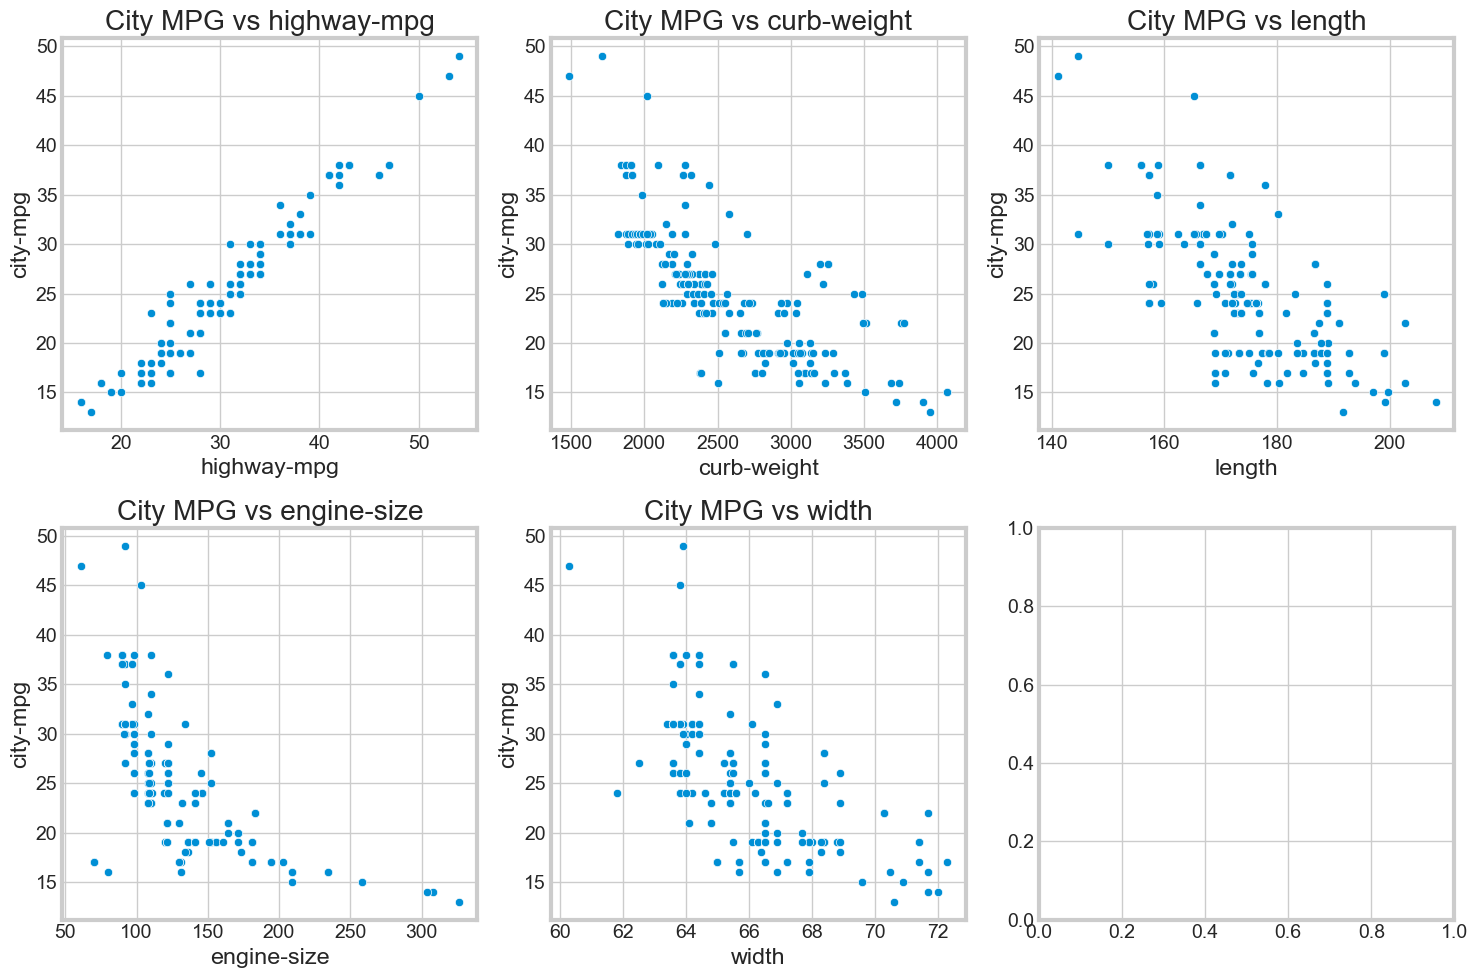

In [7]:
def plot_scatter(automobile_data, variables_to_plot):
    """
    This function plots scatter plots of 'city-mpg' against specified variables.

    :param automobile_data: DataFrame containing automobile data
    :param variables_to_plot: List of variables to plot against 'city-mpg'
    """
    # Set the aesthetic style of the plots
    sns.set_style("whitegrid")

    # Create subplots
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))

    # Loop through the variables and create the scatter plots
    for i, var in enumerate(variables_to_plot):
        row = i // 3
        col = i % 3
        sns.scatterplot(data=automobile_data, x=var, y='city-mpg', ax=axes[row, col])
        axes[row, col].set_title(f'City MPG vs {var}')

    plt.tight_layout()
    plt.show()

# Example usage:


variables_to_plot = ['highway-mpg', 'curb-weight', 'length', 'engine-size', 'width']
plot_scatter(automobile_data, variables_to_plot)

O gráfico de city-mpg vs highway-mpg mostra uma relação muito linear, o que é esperado dado que a correlação entre as duas variáveis é muito alta (0.971).

O gráfico de city-mpg vs curb-weight mostra uma relação inversamente proporcional entre o peso do carro e a milhagem na cidade, o que faz sentido, pois carros mais pesados tendem a ter uma milhagem menor.

O gráfico de city-mpg vs length mostra uma relação inversamente proporcional entre o comprimento do carro e a milhagem na cidade.

O gráfico de city-mpg vs engine-size mostra uma relação inversamente proporcional entre o tamanho do motor e a milhagem na cidade.

O gráfico de city-mpg vs width mostra uma relação inversamente proporcional entre a largura do carro e a milhagem na cidade.

Esses gráficos sugerem que highway-mpg, curb-weight, length, engine-size e width são boas variáveis preditoras para city-mpg

# Analisando mpg com variáveis qualitativas

Irei agora fazer análises da relação de mpg com variáveis qualitativas com o foco em descobrir alguns padrões. 

In [8]:
# Variáveis categóricas no conjunto de dados

automobile_data.select_dtypes(include=['object']).columns

Index(['normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'engine-type',
       'num-of-cylinders', 'fuel-system', 'bore', 'stroke', 'horsepower',
       'peak-rpm', 'price'],
      dtype='object')

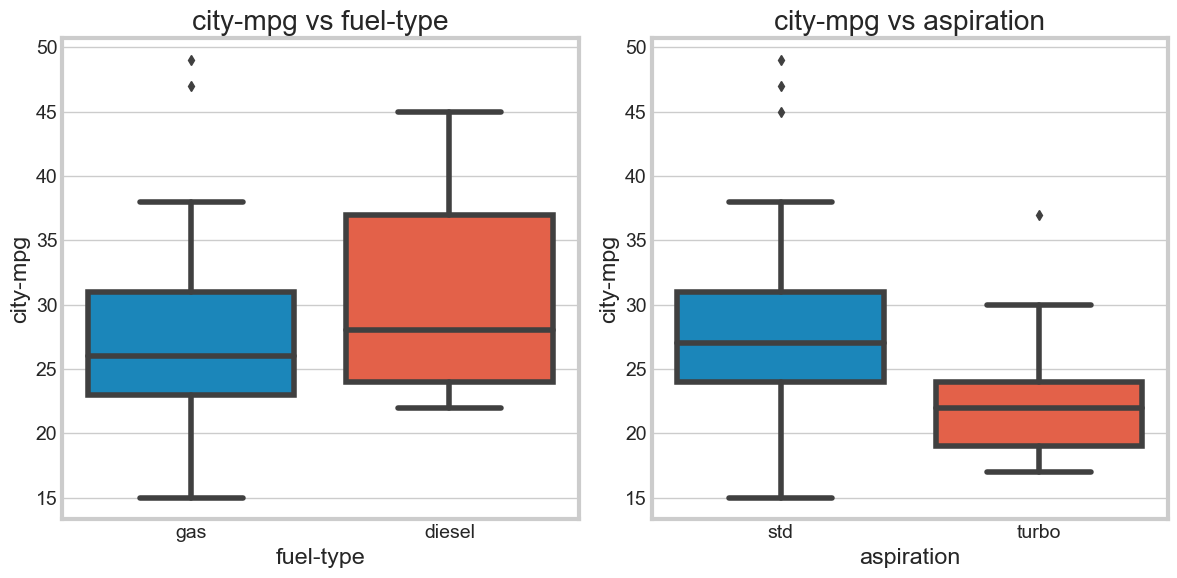

In [9]:
def create_boxplots(data, x_vars, y_var):   ## Definindo uma função para eu criar todos os meus boxplots com o mesmo padrão.
    data_clean = data.replace('?', None)
    data_clean = data_clean.dropna()
    data_clean[y_var] = pd.to_numeric(data_clean[y_var])

    plt.figure(figsize=(12, 6))

    for i, x_var in enumerate(x_vars, 1):
        plt.subplot(1, len(x_vars), i)
        sns.boxplot(x=x_var, y=y_var, data=data_clean)
        plt.title(f'{y_var} vs {x_var}')

    plt.tight_layout()
    plt.show()

create_boxplots(automobile_data, ['fuel-type', 'aspiration'], 'city-mpg')    

No gráfico da esquerda, podemos observar que os veículos a diesel tendem a ter uma maior economia de combustível na cidade (city-mpg) em comparação com os veículos a gasolina, o que faz sentido, já que a autonomia do diesel é maior. 

No gráfico da direita, os veículos com aspiração padrão (std) tendem a ter uma maior economia de combustível na cidade em comparação com os veículos com aspiração turbo, o que também faz sentido, já que carros turbos "bebem" mais combustível. 

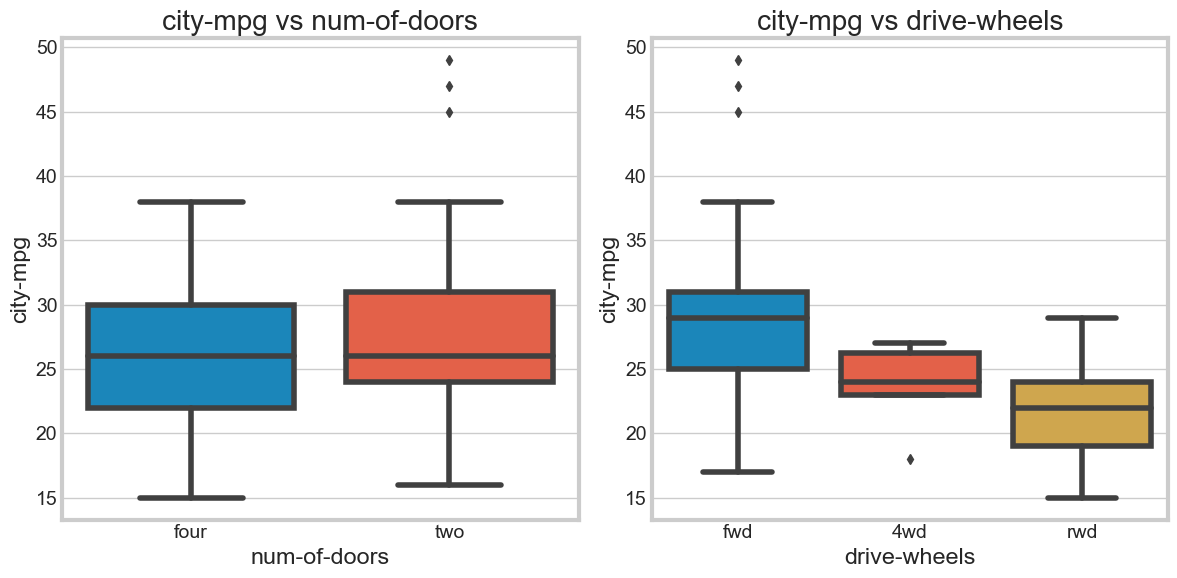

In [10]:
# List of qualitative variables to compare with 'city-mpg' and 'highway-mpg'
qualitative_vars = ['num-of-doors', 'drive-wheels']

# Create boxplots for 'city-mpg' vs qualitative variables
create_boxplots(automobile_data, qualitative_vars, 'city-mpg')

'Num-of-doors': A economia de combustível na cidade não parece variar significativamente entre carros com um número diferente de portas.

'Drive-wheels': A economia de combustível na cidade varia entre os diferentes tipos de tração. Por exemplo, os carros com tração nas quatro rodas (4wd) tendem a ter uma menor economia de combustível na cidade em comparação com outros tipos de tração. Qual seria uma possível explicação pra isso?

Peso: Carros com tração nas quatro rodas são geralmente mais pesados do que carros com tração em duas rodas, pois têm mais componentes, como um diferencial adicional e um eixo de transmissão extra. O peso adicional aumenta a quantidade de energia necessária para mover o carro, o que reduz a economia de combustível.

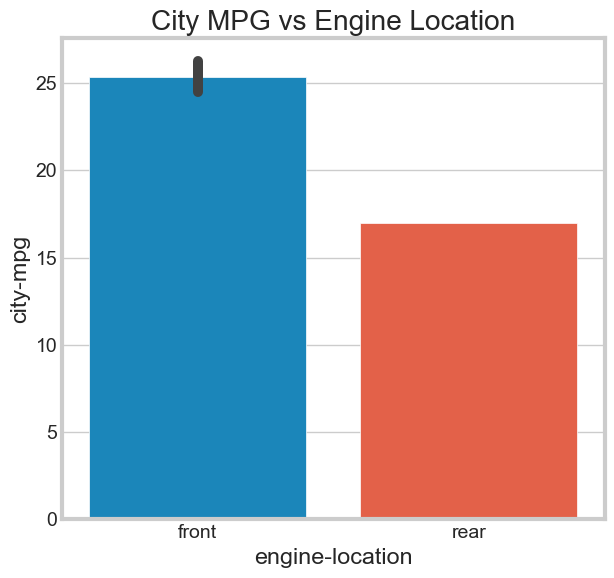

In [11]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='engine-location', y='city-mpg', data=automobile_data)
plt.title('City MPG vs Engine Location')

plt.tight_layout()
plt.show()

'Engine-location': A economia de combustível na cidade parece ser maior para carros com motor localizado na frente. O que isso quer dizer? Carros com motor na traseira são relativamente raros e muitas vezes são carros esportivos ou de luxo, que podem ter motores mais potentes e menos foco na economia de combustíves. Todavia temos poucas observações para rear, o que não nos permite fazer muitas inferências

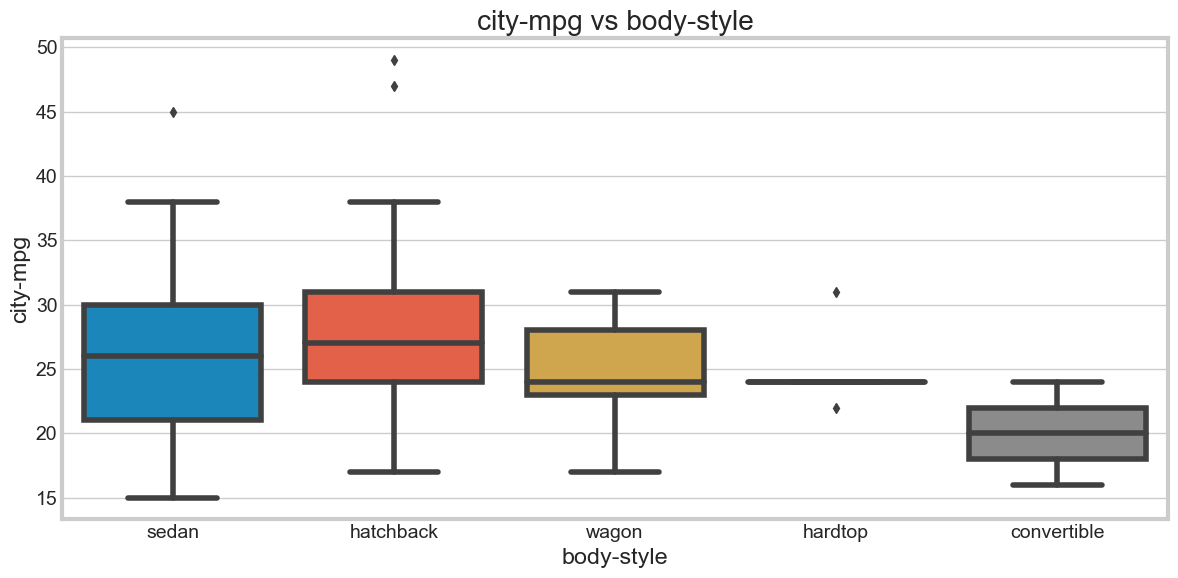

In [12]:
# List of qualitative variables to compare with 'city-mpg' and 'highway-mpg'
qualitative_vars = ['body-style']

# Create boxplots for 'city-mpg' vs qualitative variables
create_boxplots(automobile_data, qualitative_vars, 'city-mpg')

'Body-style': A economia de combustível na cidade varia entre os diferentes estilos de carroceria. Por exemplo, os carros do tipo 'hatchback' tendem a ter uma menor economia de combustível na cidade em comparação com outros estilos de carroceria. Teria alguma correlação com potência? Carros sedans tendem a ser mais potentes, logo tem menro autonomia? 

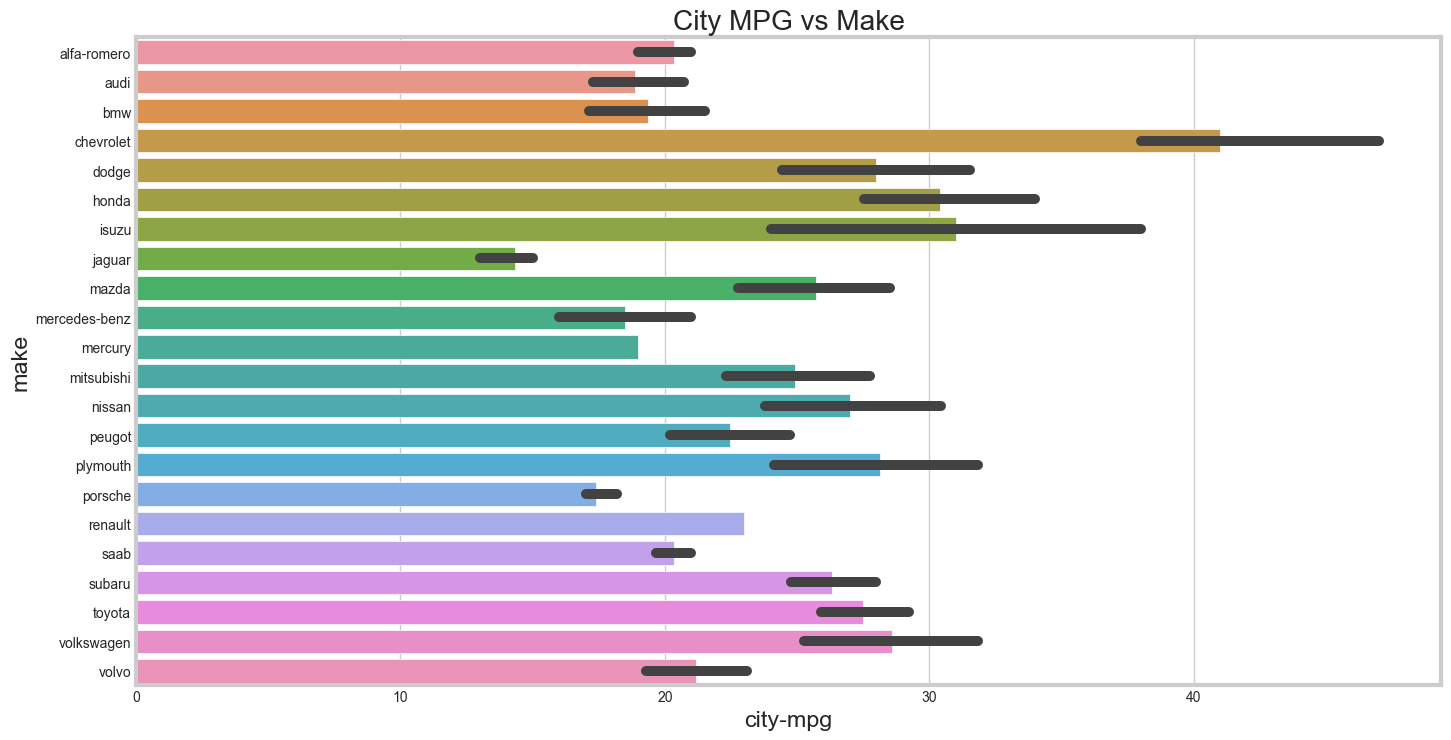

In [13]:
plt.figure(figsize=(15, 8))

sns.barplot(x='city-mpg', y='make', data=automobile_data)

plt.title('City MPG vs Make')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

O gráfico de barras horizontal mostra a economia de combustível média na cidade (City MPG) para diferentes marcas de carros (Make).

A marca 'chevrolet' tem a maior economia de combustível média na cidade, seguida por 'honda' e 'toyota'.
As marcas 'jaguar', 'mercury' e 'peugot' têm a menor economia de combustível média na cidade.
Isso sugere que as marcas americanas e asiáticas, como 'chevrolet', 'honda' e 'toyota', tendem a ter carros com maior economia de combustível na cidade, enquanto as marcas europeias, como 'jaguar' e 'peugot', tendem a ter carros com menor economia de combustível na cidade.

No entanto, é importante notar que este é apenas um gráfico de médias e não mostra a variação dentro de cada marca. Além disso, a economia de combustível é apenas um dos muitos fatores que as pessoas consideram ao escolher um carro.

In [14]:
import pandas as pd

def convert_data_types(data):
    num_cylinders_dict = {'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'eight': 8, 'twelve': 12}
    num_doors_dict = {'two': 2, 'four': 4}

    data['num-of-cylinders'] = data['num-of-cylinders'].map(num_cylinders_dict)
    data['num-of-doors'] = data['num-of-doors'].map(num_doors_dict)

    data['price'] = pd.to_numeric(data['price'], errors='coerce')
    data['horsepower'] = pd.to_numeric(data['horsepower'], errors='coerce')
    data['bore'] = pd.to_numeric(data['bore'], errors='coerce')
    data['stroke'] = pd.to_numeric(data['stroke'], errors='coerce')
    data['peak-rpm'] = pd.to_numeric(data['peak-rpm'], errors='coerce')

    return data

if __name__ == "__main__":
    data_clean = convert_data_types(automobile_data)
    print(data_clean.dtypes)


symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors         float64
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders       int64
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object


No código acima eu converti algumas variáveis que estavam categóricas para numéricas. E também modifiquei a variável 'num-of-cylinders' para ficar numérico e facilitar os gráficos 

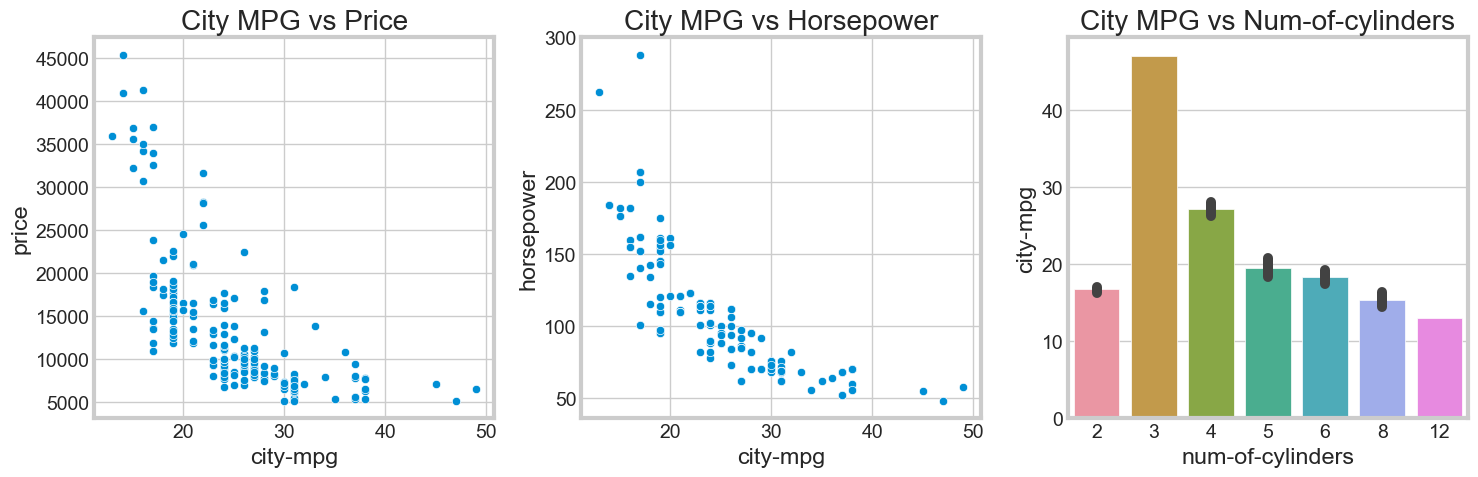

In [15]:
def create_plots(data):
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    sns.scatterplot(x='city-mpg', y='price', data=data)
    plt.title('City MPG vs Price')

    plt.subplot(1, 3, 2)
    sns.scatterplot(x='city-mpg', y='horsepower', data=data)
    plt.title('City MPG vs Horsepower')

    plt.subplot(1, 3, 3)
    sns.barplot(x='num-of-cylinders', y='city-mpg', data=data)
    plt.title('City MPG vs Num-of-cylinders')

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
     create_plots(data_clean)


City MPG vs Price': Existe uma tendência clara de que carros com maior economia de combustível na cidade tendem a ser mais baratos. Isso faz sentido, pois carros mais econômicos geralmente têm motores menores e menos potentes, o que os torna mais baratos.

'City MPG vs Horsepower': Existe uma tendência clara de que carros com maior economia de combustível na cidade tendem a ter menos cavalos de potência. Isso também faz sentido, pois carros com motores menores e menos potentes geralmente são mais eficientes em termos de combustível.

'City MPG vs Num-of-cylinders': A economia de combustível na cidade diminui à medida que o número de cilindros aumenta. Isso é esperado, pois carros com mais cilindros geralmente têm motores maiores e menos eficientes. Interessante notar os carros com 2 cilindros. Talvez eles sejam menos eficientes por conta de outros fatores na minha base de dados. Vou investigar. 

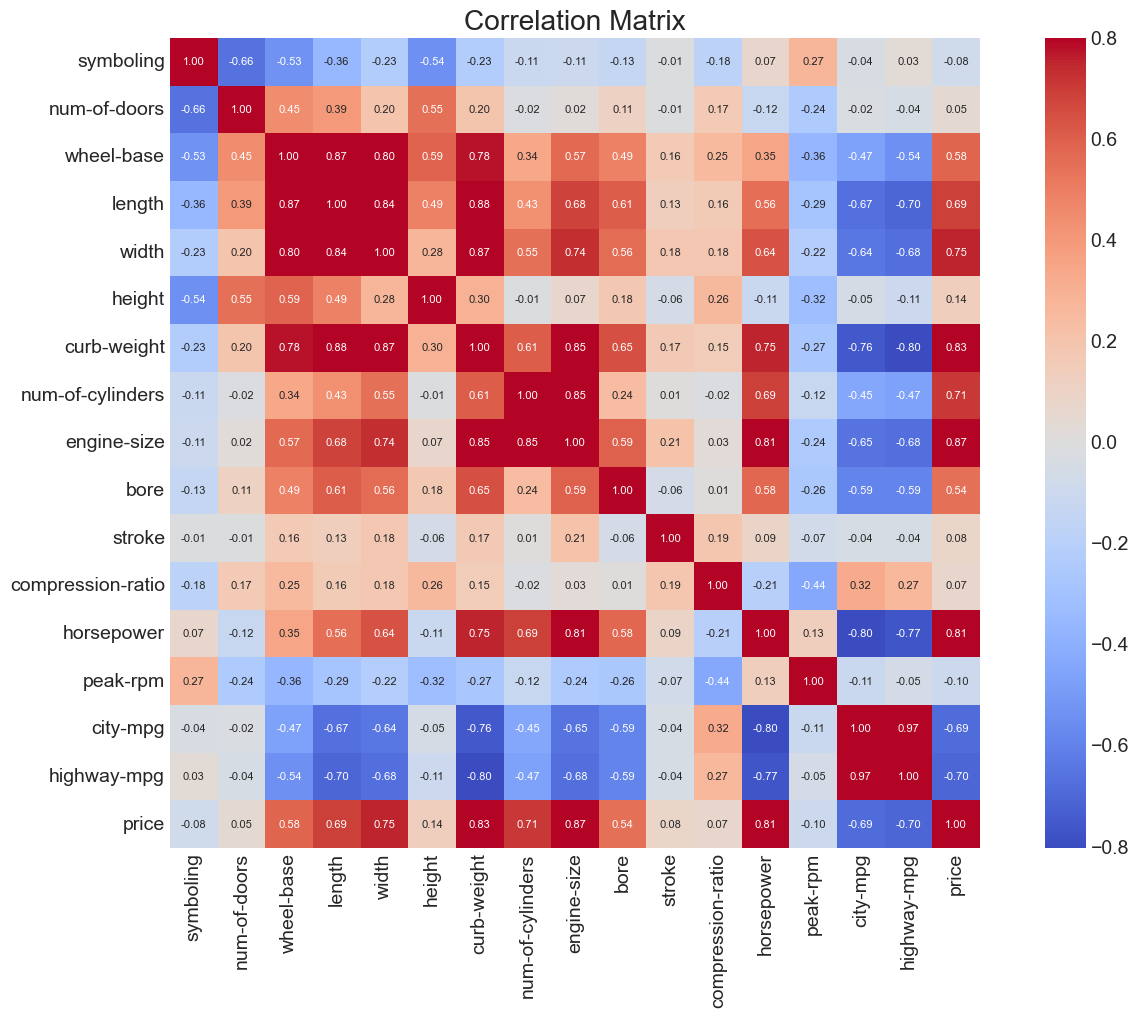

In [16]:
# Select only numeric columns
automobile_data_numeric = automobile_data.select_dtypes(include=['int64', 'float64'])

# Display the first few rows of the numeric data
automobile_data_numeric.head()

# Compute the correlation matrix
corrmat = automobile_data_numeric.corr()

# Plot the heatmap
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corrmat, annot=True, fmt=".2f", vmax=.8, square=True, cmap="coolwarm", annot_kws={"fontsize": 8})
plt.title("Correlation Matrix")
plt.show()

O mapa de calor da matriz de correlação mostra a correlação entre pares de variáveis no conjunto de dados de automóveis. A correlação varia de -1 a +1.

Um valor de correlação de +1 indica uma correlação positiva perfeita: ou seja, à medida que uma variável aumenta, a outra variável tende a aumentar em proporção direta.
Um valor de correlação de -1 indica uma correlação negativa perfeita: ou seja, à medida que uma variável aumenta, a outra variável tende a diminuir em proporção direta.
Um valor de correlação de 0 indica que não há correlação entre as duas variáveis. 
No mapa de calor acima:

'engine-size' e 'price' têm uma correlação alta (0,87), o que indica que carros com motores maiores tendem a ser mais caros.
'highway-mpg' e 'city-mpg' também têm uma correlação alta (0,97), o que é esperado, pois carros que são eficientes na cidade também tendem a ser eficientes na estrada.
'width' e 'curb-weight' têm uma correlação alta (0,87), indicando que carros mais largos tendem a ser mais pesados.
Por outro lado:

'highway-mpg' e 'price' têm uma correlação negativa (-0,70), indicando que carros mais caros tendem a ter menor eficiência de combustível na estrada.
É importante notar que correlação não implica causalidade. Uma alta correlação entre duas variáveis não necessariamente significa que uma causa a outra; pode haver outras variáveis não observadas que influenciam ambas.